In [2]:
import os
import sys
import json
import pickle
import requests
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

from bdp.data.crypto.coingecko.downloads import (
    get_all_coins_and_contracts_data,
)

from bdp.data.crypto.coingecko.utils import (
    get_current_and_past_timestamps,
)

from bdp.data.crypto.coingecko.coingecko_dataclasses import (
    CoinMetadata,
    AllCoinsMetadata)

from bdp.data.crypto.coingecko.metadata_postprocessing import get_all_metadata_dataframe
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
coingecko_key = "CG-rkg4RTUcfEWYAQ4xUejxPpkS"
date_string="2024-03-19"

all_coins_metadata = AllCoinsMetadata(date_string=date_string,coingecko_key=coingecko_key)
#all_coins_metadata.download_coins_metadata(coins_to_download=some_coins_to_download)
all_coins_metadata.download_df_timeseries()

100%|██████████| 2056/2056 [00:11<00:00, 176.40it/s]

Obtained 2056 timeserieses Missing 0


In [21]:
metadata_dataframe = get_all_metadata_dataframe(all_coins_metadata.uniswap_coins)
selected_metadata = metadata_dataframe[['id', 'contract', 'symbol', 'name', 'sentiment_votes_up_percentage','watchlist_portfolio_users', 'market_cap_rank','price_change_percentage_24h', 'price_change_percentage_7d','price_change_percentage_14d','market_cap']]

In [22]:
selected_metadata.sort_values(by="price_change_percentage_7d",ascending=False)

,id,contract,symbol,name,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,market_cap
119,shido-2,None,shido,Shido,81.82,11145,2076.0,0.49374,1527.08894,3216.53333,2777203.00
495,ime-lab,None,lime,iMe Lab,84.62,40645,710.0,5.45837,861.48369,1377.98336,51337545.00
1810,pundi-x,None,npxs,Pundi X [OLD],100.00,23594,647.0,809.66465,744.81967,838.38958,59241549.00
779,alpha-bot-calls,None,abc,Alpha Bot Calls,NaN,98,NaN,1.33659,548.07783,679.97165,0.00
1091,rigoblock,None,grg,RigoBlock,66.67,340,957.0,26.73628,442.58146,49.33463,29703632.00
...,...,...,...,...,...,...,...,...,...,...,...
1608,linktoa,None,ltao,LinkTao,NaN,155,NaN,-15.84989,-96.24113,0.00000,0.00
782,new-world-order,None,state,New World Order,100.00,944,NaN,-10.48536,-96.50401,-97.99091,0.00
627,tyrion-finance,None,$tyrion,Tyrion.finance,NaN,759,4146.0,8.23713,-98.98714,-98.10810,3413.86
1980,furari,None,cia,Cat Intelligence Agency,75.00,203,NaN,6.22271,-99.67826,-99.65599,0.00


In [23]:
selected_metadata.describe()

,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,market_cap
count,821.000000,2056.000000,1066.000000,1891.000000,2056.000000,2056.000000,2.054000e+03
mean,79.876699,10262.079767,1657.945591,-4.634530,-12.961765,2.170566,1.309345e+08
std,30.345232,32550.206115,1139.830593,22.751602,54.935408,101.416019,1.197816e+09
min,0.000000,7.000000,7.000000,-87.611390,-99.729590,-99.655990,0.000000e+00
25%,68.420000,245.000000,643.000000,-9.130045,-27.440683,-24.846735,0.000000e+00
50%,100.000000,1372.500000,1507.500000,-5.445890,-17.369870,-8.794580,7.570750e+04
75%,100.000000,8218.000000,2555.750000,-0.967625,-6.416673,4.306780,9.336597e+06
max,100.000000,661552.000000,4191.000000,809.664650,1527.088940,3216.533330,3.199975e+10


In [24]:
selected_metadata.sort_values(by="market_cap",ascending=False).head()


,id,contract,symbol,name,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,market_cap
0,staked-ether,None,steth,Lido Staked Ether,57.14,16764,7.0,-7.79684,-18.68134,-12.92362,3.199975e+10
1,usd-coin,None,usdc,USDC,61.54,124748,8.0,0.03275,-0.29466,-0.39764,3.118622e+10
2,shiba-inu,None,shib,Shiba Inu,76.09,661552,12.0,-7.44984,-22.46239,-40.02383,1.494102e+10
3,the-open-network,None,ton,Toncoin,72.92,67245,13.0,0.26544,6.00888,41.70629,1.323224e+10
4,chainlink,None,link,Chainlink,78.00,455957,15.0,-5.68953,-13.53198,-14.37526,1.035539e+10


In [25]:
price_change_percentage_7d = selected_metadata['price_change_percentage_7d'].values
price_change_percentage_14d = selected_metadata['price_change_percentage_14d'].values
print(len(price_change_percentage_14d))

2056


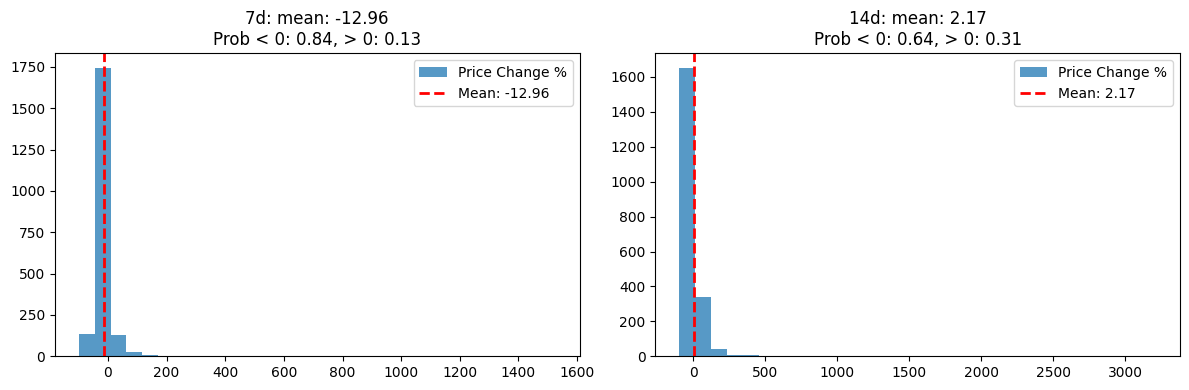

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# 7-day price change histogram with mean line
mean_7d = price_change_percentage_7d.mean()
prob_below_zero_7d = (price_change_percentage_7d < 0).mean()
prob_above_zero_7d = (price_change_percentage_7d > 0).mean()
ax[0].hist(price_change_percentage_7d, bins=30, alpha=0.75, label='Price Change %')
ax[0].axvline(mean_7d, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {round(mean_7d, 2)}')
ax[0].set_title(f"7d: mean: {round(mean_7d,2)}\nProb < 0: {prob_below_zero_7d:.2f}, > 0: {prob_above_zero_7d:.2f}")
ax[0].legend()

# 14-day price change histogram with mean line
mean_14d = price_change_percentage_14d.mean()
prob_below_zero_14d = (price_change_percentage_14d < 0).mean()
prob_above_zero_14d = (price_change_percentage_14d > 0).mean()
ax[1].hist(price_change_percentage_14d, bins=30, alpha=0.75, label='Price Change %')
ax[1].axvline(mean_14d, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {round(mean_14d, 2)}')
ax[1].set_title(f"14d: mean: {round(mean_14d,2)}\nProb < 0: {prob_below_zero_14d:.2f}, > 0: {prob_above_zero_14d:.2f}")
ax[1].legend()

plt.tight_layout()
plt.show()